# HMS - Harmful Brain Activity Classification

The goal of this competition is to detect and classify seizures and other types of harmful brain activity in electroencephalography (EEG) data. Even experts find this to be a challenging task and often disagree about the correct labels.

This is a code competition. Only a few examples from the test set are available for download. When your submission is scored the test folders will be replaced with versions containing the complete test set.

In [1]:
'''
Load the Libaries
'''

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [2]:
# Load the Data

df = pd.read_csv("train.csv")
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [3]:
df.dtypes

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                     object
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
106795    False
106796    False
106797    False
106798    False
106799    False
Length: 106800, dtype: bool

In [7]:
df.T.duplicated()

eeg_id                              False
eeg_sub_id                          False
eeg_label_offset_seconds            False
spectrogram_id                      False
spectrogram_sub_id                  False
spectrogram_label_offset_seconds    False
label_id                            False
patient_id                          False
expert_consensus                    False
seizure_vote                        False
lpd_vote                            False
gpd_vote                            False
lrda_vote                           False
grda_vote                           False
other_vote                          False
dtype: bool

In [8]:
np.sum(df.duplicated())

0

## Data Cleaning

In [6]:
df.describe(include="all")

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seizure,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20933,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,NaN,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,NaN,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000


In [7]:
#checking null values
df.isna().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [9]:
print("For each eeg and spectrogram, there is a unique patient")
print(df.groupby("eeg_id").patient_id.nunique().value_counts())
print(df.groupby("spectrogram_id").patient_id.nunique().value_counts())

print()
print("-" * 80)
print("But one patient can be recorded several times")
print(df.groupby("patient_id").eeg_id.nunique().sort_values(ascending=False))
print(df.groupby("patient_id").spectrogram_id.nunique().sort_values(ascending=False))

For each eeg and spectrogram, there is a unique patient
patient_id
1    17089
Name: count, dtype: int64
patient_id
1    11138
Name: count, dtype: int64

--------------------------------------------------------------------------------
But one patient can be recorded several times
patient_id
30631    270
28330    250
38549    205
35225    189
56450    182
        ... 
55045      1
55039      1
41529      1
54991      1
48691      1
Name: eeg_id, Length: 1950, dtype: int64
patient_id
30631    66
56450    66
35627    58
12251    58
14965    54
         ..
36402     1
55361     1
23629     1
47258     1
43409     1
Name: spectrogram_id, Length: 1950, dtype: int64


AttributeError: 'NoneType' object has no attribute 'get_frame'

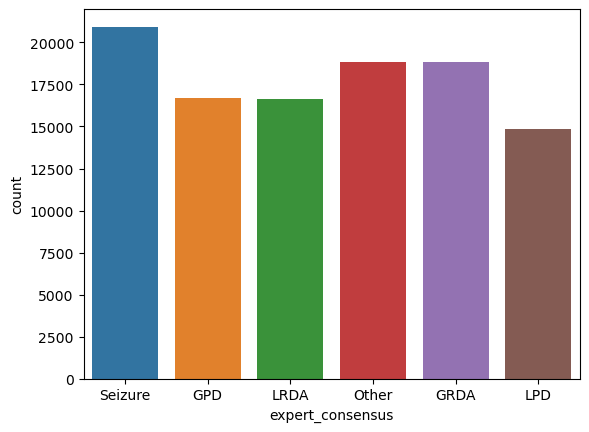

In [14]:
# Distribution of patterns is rather balanced
fig = plt.figure()
ax = sns.countplot(
    x="expert_consensus",
    data=df,
    dodge=False
)
ax.get_legend().get_frame().set_alpha(0.8)
plt.title("Expert consensus distribution")
plt.grid()

In [15]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64